<a href="https://colab.research.google.com/github/radster22/renewableResources_forecasting/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/content/renewable-share-energy.csv")
#download https://www.kaggle.com/datasets/belayethossainds/renewable-energy-world-wide-19652022?resource=download
# 01 renewable-share-energy.csv

df2 = pd.read_csv("/content/modern-renewable-energy-consumption.csv")
#df2

In [10]:
df_2021 = df[df['Year'] == 2021]

# Sort the values by 'Renewables (% equivalent primary energy)' column in descending order
df_2021_sorted = df_2021.sort_values(by='Renewables (% equivalent primary energy)', ascending=False)

# Display all entities with renewables data for 2020
print(df_2021_sorted[['Entity', 'Renewables (% equivalent primary energy)']])

                   Entity  Renewables (% equivalent primary energy)
2130              Iceland                                 86.874535
3526               Norway                                 71.558365
4731               Sweden                                 50.924007
694                Brazil                                 46.219750
3266          New Zealand                                 40.218650
...                   ...                                       ...
543            Bangladesh                                  0.650147
170               Algeria                                  0.261367
2016            Hong Kong                                  0.108699
5053         Turkmenistan                                  0.007483
4959  Trinidad and Tobago                                  0.007159

[96 rows x 2 columns]


In [11]:
df2_2021 = df2[df2['Year'] == 2021]

# Sort the values by 'Renewables (% equivalent primary energy)' column in descending order
df2_2021_sorted = df2_2021.sort_values(by='Hydro generation - TWh', ascending=False)

# Display all entities with renewables data for 2020
print(df2_2021_sorted[['Entity', 'Hydro generation - TWh']])

                             Entity  Hydro generation - TWh
5693                          World               4288.7830
3379                  Non-OECD (EI)               2838.5480
5423  Upper-middle-income countries               2231.5415
288                            Asia               1947.4166
346               Asia Pacific (EI)               1861.7267
...                             ...                     ...
3754                           Oman                     NaN
4096                          Qatar                     NaN
4250                   Saudi Arabia                     NaN
4308                      Singapore                     NaN
5243           United Arab Emirates                     NaN

[103 rows x 2 columns]


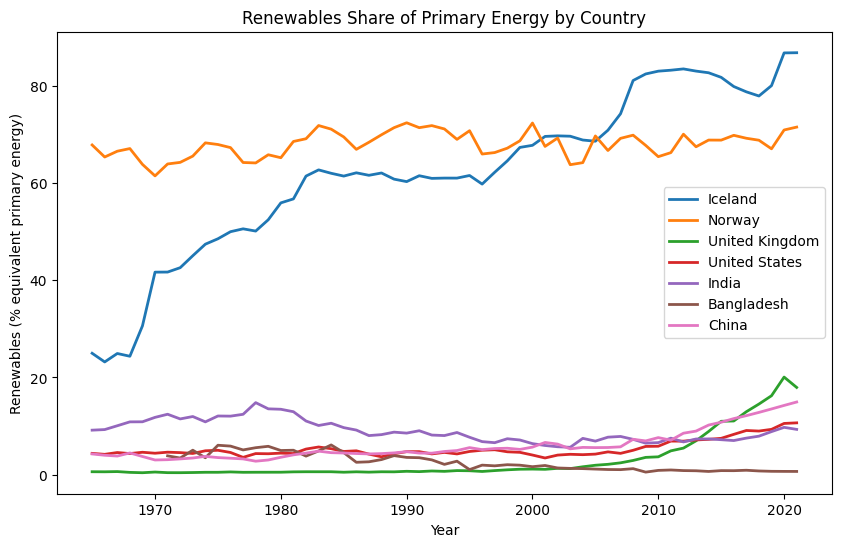

In [12]:
countries = ['Iceland', 'Norway', 'United Kingdom', 'United States', 'India', 'Bangladesh', 'China']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each country's data
for country in countries:
    country_data = df[df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewables (% equivalent primary energy)'],
             label=country, linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.title('Renewables Share of Primary Energy by Country')
plt.legend()

# Show plot
plt.grid(False)
plt.show()

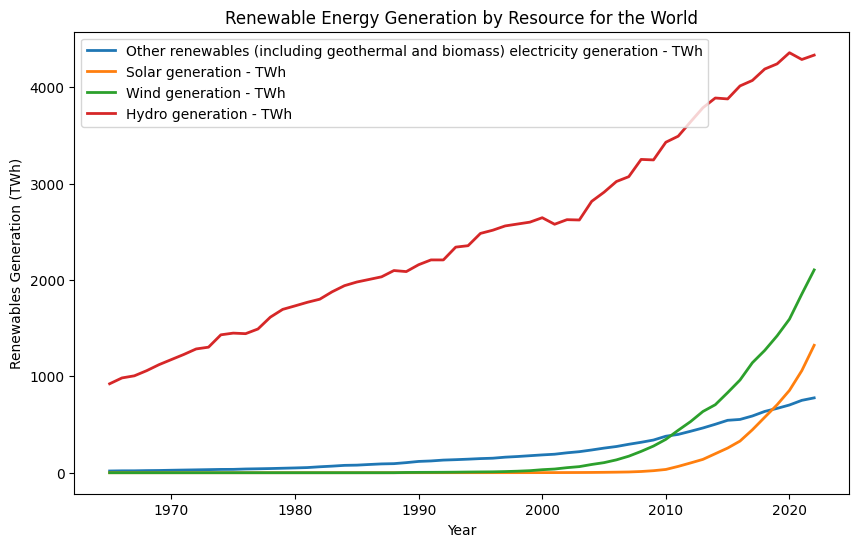

In [13]:
import matplotlib.pyplot as plt

resources = ['Other renewables (including geothermal and biomass) electricity generation - TWh',
             'Solar generation - TWh', 'Wind generation - TWh', 'Hydro generation - TWh']

plt.figure(figsize=(10, 6))

# Plot each resource's data for the world
for resource in resources:
    world_data = df2[df2['Entity'] == 'World']
    plt.plot(world_data['Year'], world_data[resource], label=resource, linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Renewables Generation (TWh)')
plt.title('Renewable Energy Generation by Resource for the World')
plt.legend()

# Show plot
plt.grid(False)
plt.show()


In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define a function to forecast for a specific resource
def forecast_resource(resource_data):
    # Fit ARIMA model
    model = ARIMA(resource_data, order=(4, 2, 6))  # Example order, you might need to tune this
    fit_model = model.fit()

    # Forecast for next 5 years
    forecast = fit_model.forecast(steps=5)
    return forecast

# Forecast for each resource
forecasts = {}
for resource in resources:
    resource_data = df2[df2['Entity'] == 'World'][resource]
    forecasts[resource] = forecast_resource(resource_data)

# Print forecasts
for resource, forecast in forecasts.items():
    print(f"Forecast for {resource} for next 5 years:")
    print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

Forecast for Other renewables (including geothermal and biomass) electricity generation - TWh for next 5 years:
58    814.099159
59    851.602844
60    890.582905
61    930.108973
62    969.228848
Name: predicted_mean, dtype: float64
Forecast for Solar generation - TWh for next 5 years:
58    1598.685498
59    1885.438968
60    2220.877855
61    2616.517152
62    3059.224065
Name: predicted_mean, dtype: float64
Forecast for Wind generation - TWh for next 5 years:
58    2348.614434
59    2570.881311
60    2863.108674
61    3195.971878
62    3553.404140
Name: predicted_mean, dtype: float64
Forecast for Hydro generation - TWh for next 5 years:
58    4350.941008
59    4392.093248
60    4467.845552
61    4548.953710
62    4576.395238
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


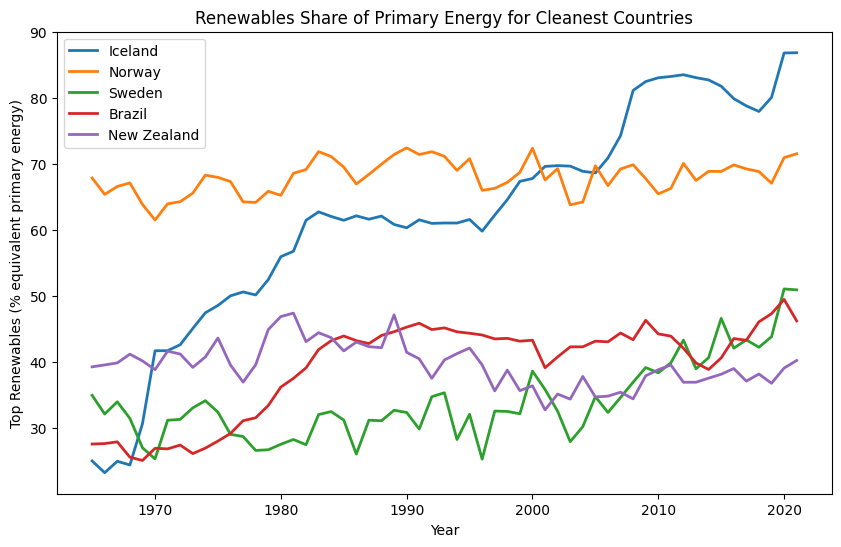

In [16]:
top_countries = ['Iceland', 'Norway', 'Sweden', 'Brazil', 'New Zealand']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each country's data
for country in top_countries:
    country_data = df[df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewables (% equivalent primary energy)'],
             label=country, linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Top Renewables (% equivalent primary energy)')
plt.title('Renewables Share of Primary Energy for Cleanest Countries')
plt.legend()

# Show plot
plt.grid(False)
plt.show()

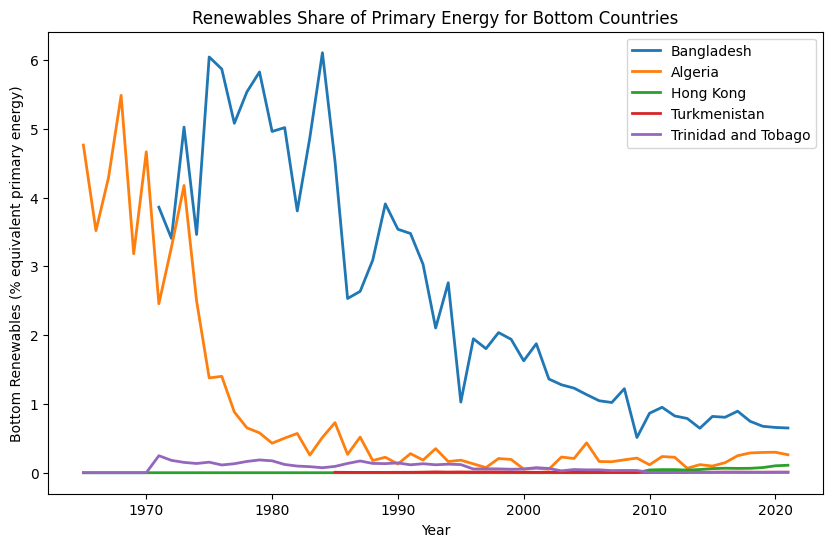

In [17]:
bottom_countries = ['Bangladesh', 'Algeria', 'Hong Kong', 'Turkmenistan', 'Trinidad and Tobago']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot each country's data
for country in bottom_countries:
    country_data = df[df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Renewables (% equivalent primary energy)'],
             label=country, linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Bottom Renewables (% equivalent primary energy)')
plt.title('Renewables Share of Primary Energy for Bottom Countries')
plt.legend()

# Show plot
plt.grid(False)
plt.show()

In [18]:
countries = ['Iceland', 'Norway', 'United Kingdom', 'United States', 'India', 'Bangladesh', 'China']
df_countries = df[df['Entity'].isin(countries)]

# Convert year to datetime
df_countries['Year'] = pd.to_datetime(df_countries['Year'], format='%Y')

# Split the data into train and test based on the year
train_data = df_countries[df_countries['Year'] <= '2020-01-01']
test_data = df_countries[df_countries['Year'] > '2020-01-01']


<ipython-input-18-b4ba7d27191f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Year'] = pd.to_datetime(df_countries['Year'], format='%Y')


<ipython-input-19-a13c7f8e8fa6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Year'] = pd.to_datetime(us_data['Year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(date

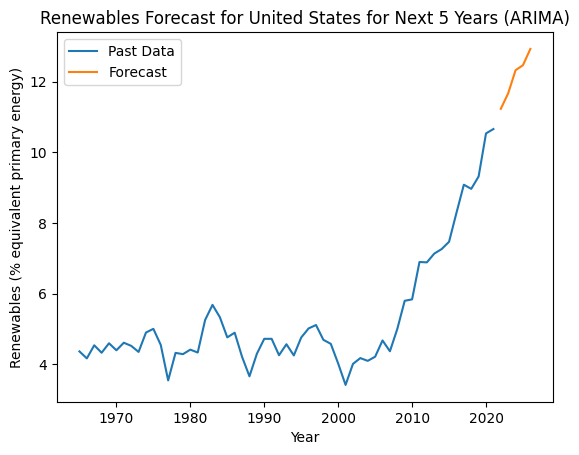

Forecast for United States for next 5 years:
2022-01-01    11.227688
2023-01-01    11.665412
2024-01-01    12.319554
2025-01-01    12.461657
2026-01-01    12.921225
Freq: YS-JAN, Name: predicted_mean, dtype: float64


In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Filter the DataFrame for the United States
country = 'United States'
us_data = df[df['Entity'] == country]

# Convert year to datetime
us_data['Year'] = pd.to_datetime(us_data['Year'], format='%Y')

# Split the data into train and test based on the year
us_train_data = us_data[us_data['Year'] <= '2020-01-01']
us_test_data = us_data[us_data['Year'] >= '2020-01-01']

# Prepare data for ARIMA
us_data_arima = us_data.set_index('Year')['Renewables (% equivalent primary energy)']
us_train_data_arima = us_train_data.set_index('Year')['Renewables (% equivalent primary energy)']
us_test_data_arima = us_test_data.set_index('Year')['Renewables (% equivalent primary energy)']

# Fit ARIMA model
model = ARIMA(us_data_arima, order=(4, 2, 6))  # Example order, you might need to tune this
fit_model = model.fit()

# Forecast for next 5 years
forecast = fit_model.forecast(steps=5)

# Plot forecast
# plt.plot(us_train_data_arima.index, us_train_data_arima, label='Training Data')
# plt.plot(us_test_data_arima.index, us_test_data_arima, label='Test Data')
plt.plot(us_data_arima.index, us_data_arima, label='Past Data')
# Adjust the x-axis range for the forecast plot

plt.plot(pd.date_range(start=us_data_arima.index[-2], periods=6, freq='Y')[1:], forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.title(f'Renewables Forecast for United States for Next 5 Years (ARIMA)')
plt.legend()
plt.show()

print("Forecast for United States for next 5 years:")
print(forecast)


<ipython-input-20-a5f510b47624>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['Year'] = pd.to_datetime(us_data['Year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(date

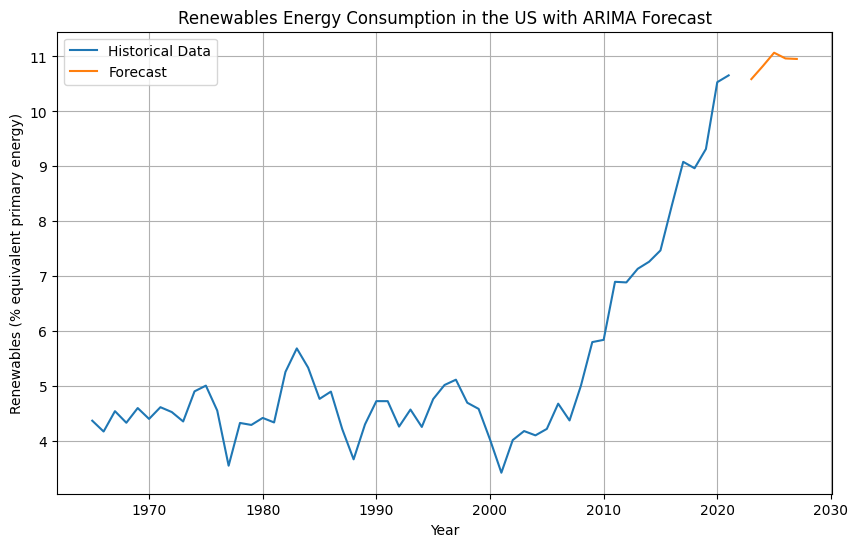

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already loaded your data and set the 'Year' column to datetime
us_data = df[df['Entity'] == country]

# Convert year to datetime
us_data['Year'] = pd.to_datetime(us_data['Year'], format='%Y')

# Fit ARIMA model
model = ARIMA(us_data_arima, order=(5,1,0))
model_fit = model.fit()

# Forecast next 5 years
forecast = model_fit.forecast(steps=5)

# Prepare forecast dates
last_year = us_data_arima.index[-1].year
forecast_dates = pd.date_range(start=pd.Timestamp(last_year + 1, 1, 1), periods=5, freq='Y')

# Plot data and forecast
plt.figure(figsize=(10, 6))
plt.plot(us_data_arima.index, us_data_arima, label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.title('Renewables Energy Consumption in the US with ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Renewables (% equivalent primary energy)')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test data
forecast_values = fit_model.forecast(steps=len(us_test_data_arima))

# Calculate mean squared error (MSE)
mse = mean_squared_error(us_test_data_arima, forecast_values)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(us_test_data_arima, forecast_values)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 0.7512947142284548
Mean Absolute Error (MAE): 0.8524384478178009


In [22]:
us_train_data_arima.index[-1]

Timestamp('2020-01-01 00:00:00')

In [23]:
us_data_arima.index[-2]

Timestamp('2020-01-01 00:00:00')